<a href="https://colab.research.google.com/github/franrilo/Test-Notebooks/blob/main/ITX_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [312]:
raw_data_unfiltered = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITX Stock/ITX stocks.csv', index_col='Date', parse_dates=True)

raw_data = raw_data_unfiltered.dropna(axis=0, how='any')

raw_data.head(10)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-05-25,3.600,3.676,3.580,3.602,-0.137946,50448300.0
2001-05-28,3.560,3.604,3.544,3.580,-0.137103,26118945.0
2001-05-29,3.562,3.626,3.562,3.614,-0.138405,26910070.0
2001-05-30,3.606,3.648,3.602,3.620,-0.138635,48229995.0
2001-05-31,3.620,3.676,3.610,3.670,-0.140550,24806710.0
2001-06-01,3.664,3.696,3.640,3.660,-0.140167,20779305.0
2001-06-04,3.642,3.804,3.642,3.800,-0.145529,35163235.0
2001-06-05,3.802,3.866,3.774,3.822,-0.146371,35137060.0
2001-06-06,3.846,3.870,3.784,3.830,-0.146678,19954860.0


In [313]:
raw_data.count()

Open         5069
High         5069
Low          5069
Close        5069
Adj Close    5069
Volume       5069
dtype: int64

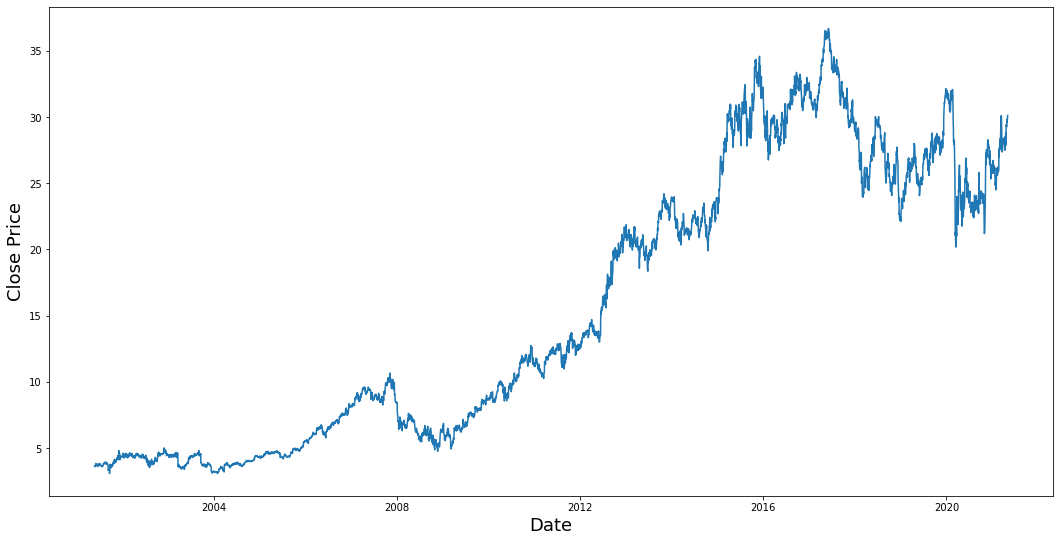

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(raw_data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [314]:
train_size = 90

train_split = (raw_data.shape[0]*train_size)// 100


X_train_data = raw_data.iloc[:train_split,3:4].values
X_test_data = raw_data.iloc[train_split:,3:4].values

print("X train shape:" + str(X_train_data.shape) + "\n")
print("X test shape:" + str(X_test_data.shape) + "\n")

X train shape:(4562, 1)

X test shape:(507, 1)



In [315]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_scaled = sc.fit_transform(X_train_data)
X_test_scaled = sc.fit_transform(X_test_data)

In [316]:
X_train = []
y_train = []

X_test = []
y_test = []

window_size = 60

for i in range (window_size,X_train_scaled.shape[0]):
  X_train.append(X_train_scaled[i-window_size:i,0])
  y_train.append(X_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

print("X train shape:" + str(X_train.shape) + "\n")
print("y train shape:" + str(y_train.shape) + "\n")


for i in range (window_size,X_test_scaled.shape[0]):
  X_test.append(X_test_scaled[i-window_size:i,0])
  y_test.append(X_test_scaled[i,0])

X_test, y_test = np.array(X_test) , np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

print("X test shape:" + str(X_test.shape) + "\n")
print("y test shape:" + str(y_test.shape) + "\n")


X train shape:(4502, 60, 1)

y train shape:(4502,)

X test shape:(447, 60, 1)

y test shape:(447,)



In [317]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))


model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['Accuracy'])

model.fit(X_train,y_train, epochs = 20, batch_size=32)

Epoch 1/20
141/141 [==============================] - 30s 137ms/step - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 2/20
141/141 [==============================] - 19s 137ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 3/20
141/141 [==============================] - 19s 137ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 4/20
141/141 [==============================] - 19s 135ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 5/20
141/141 [==============================] - 19s 133ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 6/20
141/141 [==============================] - 19s 136ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 7/20
141/141 [==============================] - 20s 142ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 8/20
141/141 [==============================] - 21s 146ms/step - loss: 9.1658e-04 - accuracy: 0.0000e+00
Epoch 9/20
141/141 [==============================] - 20s 142ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 10/20
141/141 [============

In [318]:
predictions_untransformed = model.predict(X_test)
predictions = sc.inverse_transform(predictions_untransformed)

(447, 1)


In [352]:
Real_Values = raw_data.iloc[train_split+window_size:].to_numpy()[:,4]
Real_Values = np.reshape(Real_Values, (Real_Values.shape[0],1))

(447, 1)

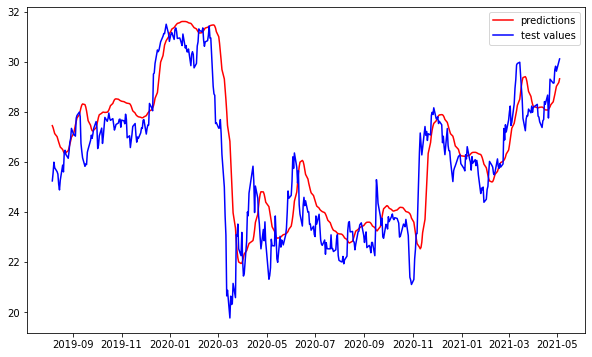

In [353]:
plt.figure(figsize=(10,6))
plt.plot(Dates.index.values, predictions, color='red', label='predictions')
plt.plot(Dates.index.values, Real_Values, color='blue', label='test values')
plt.legend()

In [375]:
prediction_mean_squared_error = mean_squared_error(Real_Values, predictions)
prediction_mean_absolut_error = mean_absolute_error(Real_Values, predictions)
prediction_explained_variance_score = explained_variance_score(Real_Values, predictions)
print("Prediction Mean Squared Error: " + str(prediction_mean_squared_error))
print("Prediction Mean Absolut Error: "  + str(prediction_mean_absolut_error))
print("Explained Variance Score: "  + str(prediction_explained_variance_score))

mean = Real_Values.mean()
print(mean)
percentage = (prediction_mean_absolut_error/mean)*100
print(percentage)

Prediction Mean Squared Error: 2.1003668536378752
Prediction Mean Absolut Error: 1.0190660846231276
Explained Variance Score: 0.751061976682402
25.98370315883669
3.921943221078392
